In [1]:
%load_ext autoreload
%matplotlib inline
from IPython.display import display

In [2]:
# python -m pip install 'git+https://github.com/MaureenZOU/detectron2-xyz.git'

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append(".")
sys.path.append("../../")
import os

from utils.logging import CustomLogger
from utils import logging
from agents import agent_factory

from executor import SimpleExecutor, LineWiseExecutor

from utils.image_utils import visualize_image, resize_image


/home/kaixin/anaconda3/envs/dom/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
logger = CustomLogger()
logging.set_logger(logger)

Specify Your task here.

In [4]:
# prompt="""Task: Put the red block into the green bowl."""
prompt="""Task: Put the orange with a barcode tag in the bowl."""

In [5]:
image = Image.open("../../tests/assets/images/oranges_on_table.png")
agent = agent_factory("DOM")

Input image:


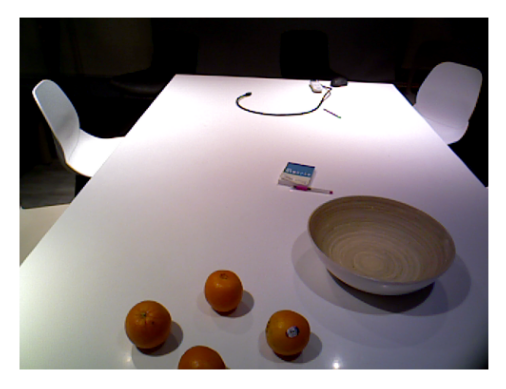

PlanResult(success=True,
 exception=None,
plan_raw="To complete the task, the robot needs to pick the orange with a barcode tag and place it inside the bowl. From the image, it appears that the orange with the barcode tag is object number 2, and the bowl is object number 1. Since there are no objects on top of the orange with the barcode tag, it can be picked up.\n\nHere is the plan code to perform the operation:\n\n```python\npick(obj=regions[2])\nplace(obj=regions[1], orientation='inside')\n```",
 masks=<2 masks>,
 prompt='Task: Put the orange with a barcode tag in the bowl.',
 plan_code="\npick(obj=regions[1])\nplace(obj=regions[0], orientation='inside')\n",
 annotated_image=<PIL.Image.Image image mode=RGB size=512x389 at 0x7903574412D0>,
 info_dict={'configs': {'label_mode': '1', 'alpha': 0.25}, 'plan_raw_before_inspect': 'Plan:\n1. pick(orange_with_barcode)\n2. place(bowl, inside)\n\n```json\n[\n  {"name": "orange"},\n  {"name": "bowl"}\n]\n```'})
Annotated image: 


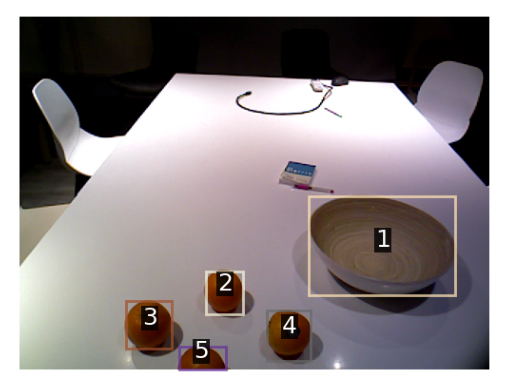

In [6]:
print("Input image:")
visualize_image(image)
plan_result = agent.try_plan(prompt, image)
print(plan_result)

if plan_result.success:
    print("Annotated image: ")
    visualize_image(plan_result.annotated_image)
    # Build a context containing the masks for the plan code to access
    masks = {"regions": [mask["segmentation"] for mask in plan_result.masks]}




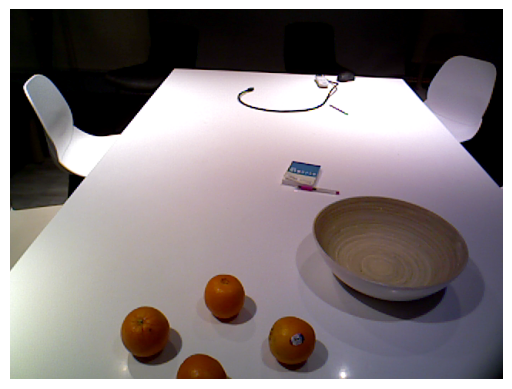
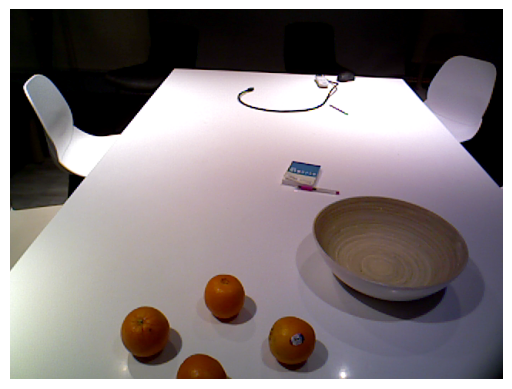
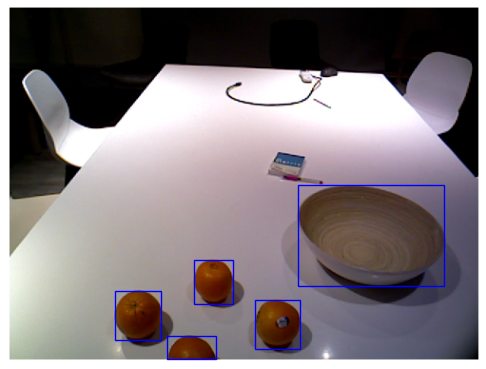
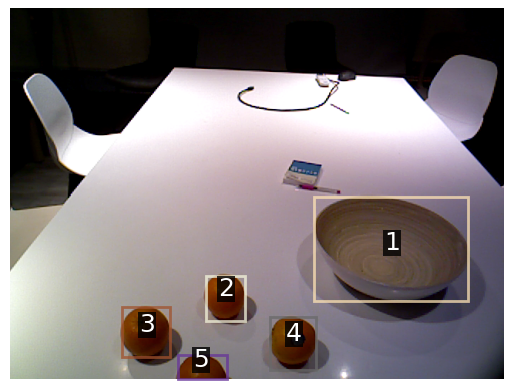
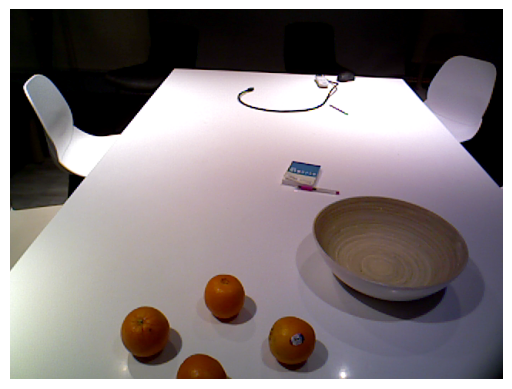

In [7]:
logging.get_logger().display_html_logs_in_notebook()

In [8]:
logger.save_logs_to_html_file("result.html")